In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
d = pd.read_csv('/content/gdrive/MyDrive/Final Project/fdata.csv')

In [ ]:
d

,time,product_code,product_name,pack_size,carton_size,cartoon_price,packet_price,cartoon_quantity,packet_quantity,value,region_code,use,sale
0,2019-05-01,101,3 Option,25,40,4200,105,10,0,33600,10000,fungus,8800
1,2019-06-01,101,3 Option,25,40,4200,105,10,0,33600,10000,fungus,9100
2,2019-07-01,101,3 Option,25,40,4200,105,10,0,33600,10000,fungus,9355
3,2019-08-01,101,3 Option,25,40,4200,105,10,0,33600,10000,fungus,6345
4,2019-05-01,102,3 Option,50,30,5850,195,127,0,594360,10000,fungus,142590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,2019-08-01,701,Zangol Mara 18 WP,100,24,1560,65,37,0,46176,40000,weed,11854
828,2019-05-01,701,Zangol Mara 18 WP,100,24,1560,65,88,0,109824,50000,weed,27456
829,2019-06-01,701,Zangol Mara 18 WP,100,24,1560,65,88,0,109824,50000,weed,16473
830,2019-07-01,701,Zangol Mara 18 WP,100,24,1560,65,88,0,109824,50000,weed,34947


In [ ]:
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date wrangling
import datetime

# Math operations
import numpy as np

# Random sampling
import random

# Keras API
from tensorflow import keras

# Deep learning
from keras.models import Input, Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Concatenate, SimpleRNN, Masking, Flatten
from keras import losses
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal

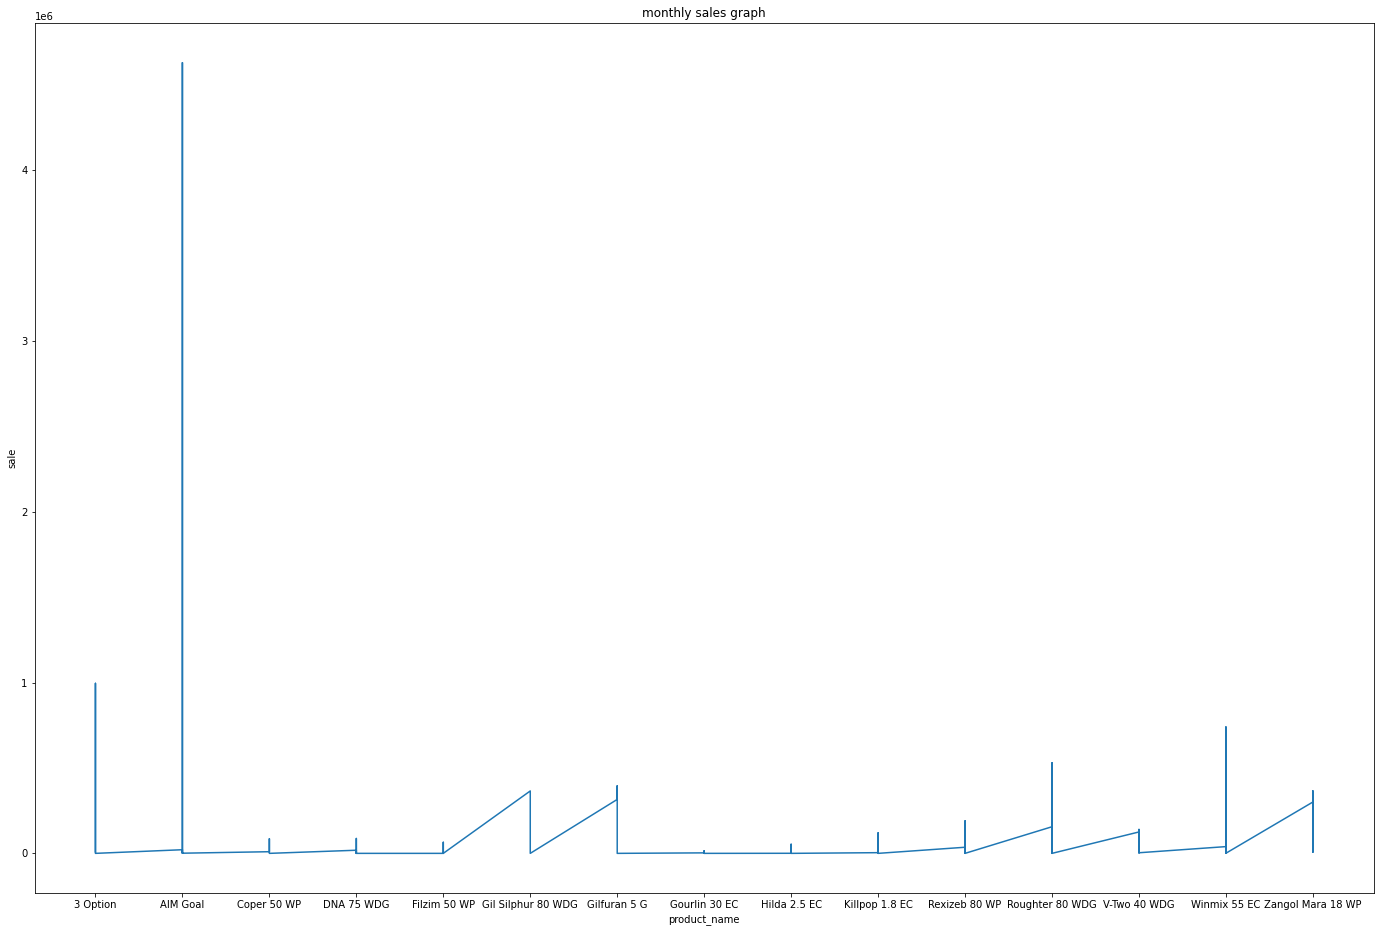

In [ ]:
plt.figure(figsize=(24, 16))
plt.plot('product_name', 'sale', data=d)
plt.title('monthly sales graph')
plt.ylabel('sale')
plt.xlabel('product_name')
plt.show()

In [ ]:
import pandas as pd # importing them, now "pd" is defined

def foo(): ... # defining a function, now "foo" is defined

bar = 10 # assigning variables, now "bar" is defined

class Baz(object): ... # creating classes, now "Baz" is defined

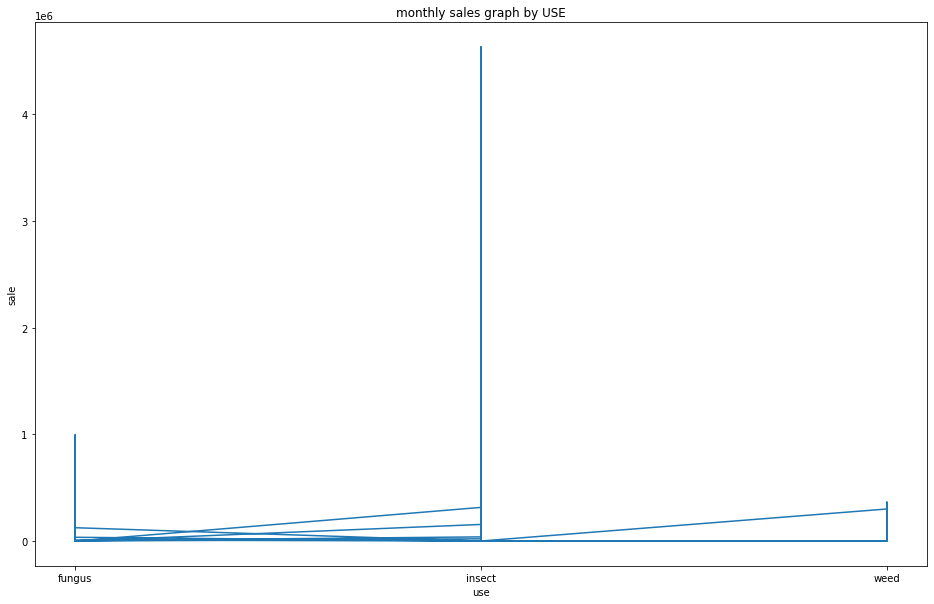

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot('use', 'sale', data=d)
plt.title('monthly sales graph by USE')
plt.ylabel('sale')
plt.xlabel('use')
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot('use', 'sale', data=d)
plt.title('monthly sales graph by USE')
plt.ylabel('sale')
plt.xlabel('use')
plt.show()

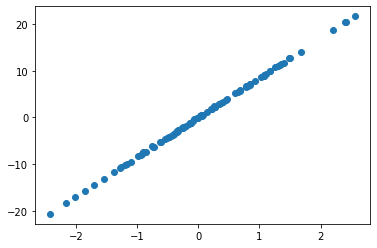

In [ ]:

from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

In [ ]:
d.drop("product_name", axis=1, inplace=True)

In [ ]:
d.drop("use", axis=1, inplace=True)

In [ ]:
d

,time,product_code,pack_size,carton_size,cartoon_price,packet_price,cartoon_quantity,packet_quantity,value,region_code,sale
0,2019-05-01,101,25,40,4200,105,10,0,33600,10000,8800
1,2019-06-01,101,25,40,4200,105,10,0,33600,10000,9100
2,2019-07-01,101,25,40,4200,105,10,0,33600,10000,9355
3,2019-08-01,101,25,40,4200,105,10,0,33600,10000,6345
4,2019-05-01,102,50,30,5850,195,127,0,594360,10000,142590
...,...,...,...,...,...,...,...,...,...,...,...
827,2019-08-01,701,100,24,1560,65,37,0,46176,40000,11854
828,2019-05-01,701,100,24,1560,65,88,0,109824,50000,27456
829,2019-06-01,701,100,24,1560,65,88,0,109824,50000,16473
830,2019-07-01,701,100,24,1560,65,88,0,109824,50000,34947


In [ ]:
d.isnull().sum()

time                0
product_code        0
pack_size           0
carton_size         0
cartoon_price       0
packet_price        0
cartoon_quantity    0
packet_quantity     0
value               0
region_code         0
sale                0
dtype: int64

In [ ]:
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date wrangling
import datetime

# Math operations
import numpy as np

# Random sampling
import random

# Keras API
from tensorflow import keras

# Deep learning
from keras.models import Input, Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Concatenate, SimpleRNN, Masking, Flatten
from keras import losses
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal

In [ ]:
def create_X_Y(ts: np.array, lag=1, n_ahead=1, target_index=0) -> tuple:
    """
    A method to create X and Y matrix from a time series array for the training of
    deep learning models
    """
    # Extracting the number of features that are passed from the array
    n_features = ts.shape[1]

    # Creating placeholder lists
    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag - n_ahead):
            Y.append(ts[(i + lag):(i + lag + n_ahead), target_index])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an RNN input shape
    X = np.reshape(X, (X.shape[0], lag, n_features))

    return X, Y

In [ ]:
print(f'Shape of data: {d.shape}')

Shape of data: (832, 11)


In [ ]:
d.dtypes

time                object
product_code         int64
pack_size            int64
carton_size          int64
cartoon_price        int64
packet_price         int64
cartoon_quantity     int64
packet_quantity      int64
value                int64
region_code          int64
sale                 int64
dtype: object

In [ ]:
#d['time'] = pd.to_datetime(d['time']).astype(np.int64)


In [ ]:
d.dtypes

time                object
product_code         int64
pack_size            int64
carton_size          int64
cartoon_price        int64
packet_price         int64
cartoon_quantity     int64
packet_quantity      int64
value                int64
region_code          int64
sale                 int64
dtype: object

In [ ]:
#d['time'].strftime('%Y%m')
print(str(d['time']).replace('-','')[:6])

0     


In [ ]:
datetime_object = datetime.datetime.strptime('2019-06-01', '%Y-%m-%d')
datetime_object

datetime.datetime(2019, 6, 1, 0, 0)

In [ ]:
# Converting the dt column to datetime object
d['time'] = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in d['time']]

# Sorting by the date
d.sort_values('time', inplace=True)

In [ ]:
# Listing the min and the max dates
print(f"First date {min(d['time'])}")
print(f"Most recent date {max(d['time'])}")

First date 2019-05-01 00:00:00
Most recent date 2019-08-01 00:00:00


In [ ]:
print(f"Total unique dates in the dataset: {len(set(d['time']))}")

Total unique dates in the dataset: 4


In [ ]:
print(f"Number of rows in the dataset: {d.shape[0]}")

Number of rows in the dataset: 832


In [ ]:
d

,time,product_code,pack_size,carton_size,cartoon_price,packet_price,cartoon_quantity,packet_quantity,value,region_code,sale
0,2019-05-01,101,25,40,4200,105,10,0,33600,10000,8800
744,2019-05-01,1103,250,10,2900,290,179,0,415280,10000,152348
340,2019-05-01,802,2000,5,1450,290,89,0,103240,40000,20810
336,2019-05-01,801,1000,10,1550,155,271,8,337032,40000,80258
328,2019-05-01,801,1000,10,1550,155,831,0,1030440,20000,250610
...,...,...,...,...,...,...,...,...,...,...,...
431,2019-08-01,1404,400,10,2900,290,15,0,34800,10000,4185
427,2019-08-01,1403,100,30,2340,78,40,0,74880,10000,11806
423,2019-08-01,1402,50,30,1380,46,13,0,14352,10000,1222
411,2019-08-01,901,100,30,2400,80,0,0,0,50000,0


In [ ]:
# Features used in models
features = ['product_code', 'pack_size', 'carton_size' ,'cartoon_price' , 'packet_price', 'cartoon_quantity', 'value','region_code','sale']

# Aggregating to hourly level
d = d.groupby('time', as_index=False)[features].mean()

# Creating the data column
d['time'] = [x.date() for x in d['time']]

In [ ]:
d[features].describe()

,product_code,pack_size,carton_size,cartoon_price,packet_price,cartoon_quantity,value,region_code,sale
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,121252.057692
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6537.037206
min,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,111784.346154
25%,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,120127.641827
50%,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,123218.423077
75%,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,124342.838942
max,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,126787.038462


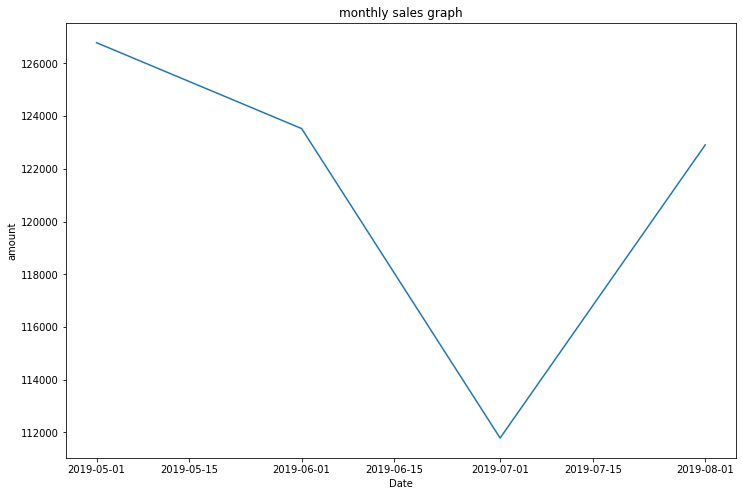

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot('time', 'sale', data=d)
plt.title('monthly sales graph')
plt.ylabel('amount')
plt.xlabel('Date')
plt.show()

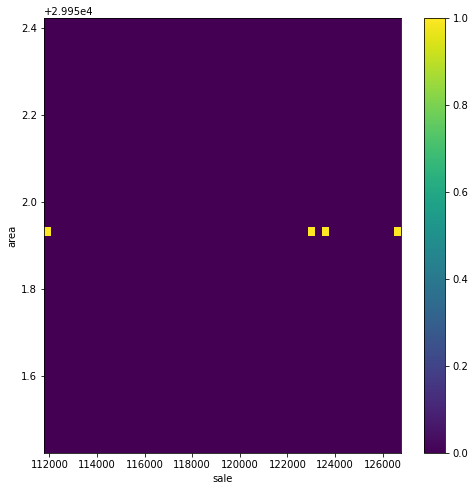

In [ ]:
plt.figure(figsize=(8, 8))
plt.hist2d(d['sale'], d['region_code'], bins=(50, 50))
plt.colorbar()
ax = plt.gca()
plt.xlabel('sale')
plt.ylabel('area')
ax.axis('tight')
plt.show()

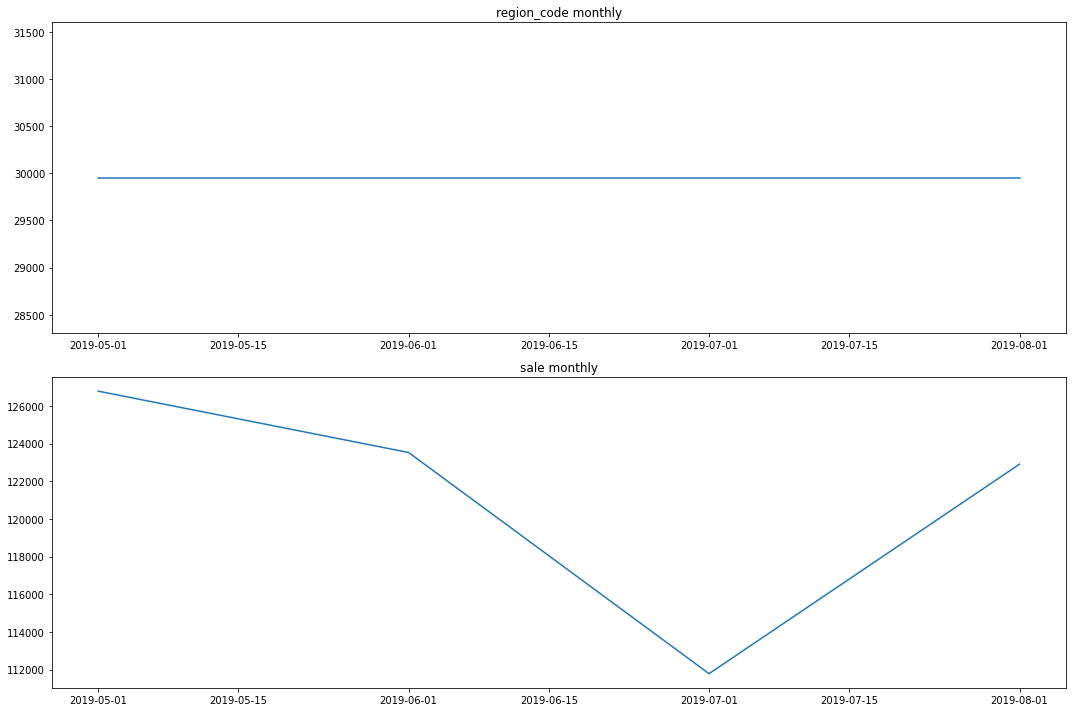

In [ ]:
plot_features = d[features]
plot_features.index = d.time

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(15, 10),
    facecolor="w",
    edgecolor="k"
)

for i, feature in enumerate(['region_code', 'sale']):
    axes[i % 2].plot(plot_features[feature])
    axes[i % 2].set_title(f'{feature} monthly')

plt.tight_layout()

plt.show()

In [ ]:
#plot_features = d.groupby('time')[features].mean()

#fig, axes = plt.subplots(
#    nrows=2,
#    ncols=2,
#    figsize=(15, 10),
#    facecolor="w",
 #   edgecolor="k"
#)

#for i, feature in enumerate(features):
#    axes[i // 2, i % 2].plot(plot_features[feature])
#    axes[i // 2, i % 2].set_title(f'{feature} ')

#plt.tight_layout()
#plt.show()

Feature engineering


In [ ]:
# Extracting the hour of day
#d['hour'] = [x.hour for x in d['time']]

# Extracting the month of the year
d['month'] = [x.month for x in d['time']]

In [ ]:
#d.boxplot('temp', by='hour', figsize=(12, 8), grid=False)
#d.boxplot('temp', by='month', figsize=(12, 8), grid=False)

In [ ]:
# Creating the cyclical daily feature
d['day_cos'] = [np.cos(x * (2 * np.pi / 24)) for x in d['month']]
d['day_sin'] = [np.sin(x * (2 * np.pi / 24)) for x in d['month']]

In [ ]:
dsin = d[['time', 'sale', 'month', 'day_sin', 'day_cos']].head(25).copy()
dsin['day_sin'] = [round(x, 3) for x in dsin['day_sin']]
dsin['day_cos'] = [round(x, 3) for x in dsin['day_cos']]

dsin

,time,sale,month,day_sin,day_cos
0,2019-05-01,126787.038462,5,0.966,0.259
1,2019-06-01,123528.105769,6,1.000,0.000
2,2019-07-01,111784.346154,7,0.966,-0.259
3,2019-08-01,122908.740385,8,0.866,-0.500


In [ ]:
dsin = d[['product_code', 'pack_size', 'carton_size' ,'cartoon_price' , 'packet_price', 'cartoon_quantity', 'value','region_code','sale', 'day_sin', 'day_cos']].head(25).copy()
dsin['day_sin'] = [round(x, 3) for x in dsin['day_sin']]
dsin['day_cos'] = [round(x, 3) for x in dsin['day_cos']]

dsin

,product_code,pack_size,carton_size,cartoon_price,packet_price,cartoon_quantity,value,region_code,sale,day_sin,day_cos
0,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,126787.038462,0.966,0.259
1,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,123528.105769,1.000,0.000
2,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,111784.346154,0.966,-0.259
3,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,122908.740385,0.866,-0.500


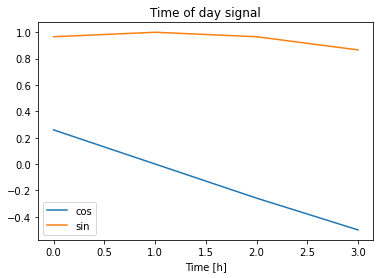

In [ ]:
# Ploting the first 25 hours
plt.plot(np.array(d['day_cos'])[:25], label='cos')
plt.plot(np.array(d['day_sin'])[:25], label='sin')
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.legend()
plt.show()

In [ ]:
#import time
#time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())

In [ ]:
# Extracting the timestamp from the datetime object
d['timestamp'] = [time.mktime(x.timetuple()) for x in d['time']]

# Seconds in day
s = 24 * 60 * 60

# Seconds in year
year = (365.25) * s

d['month_cos'] = [np.cos((x) * (2 * np.pi / year)) for x in d['timestamp']]
d['month_sin'] = [np.sin((x) * (2 * np.pi / year)) for x in d['timestamp']]

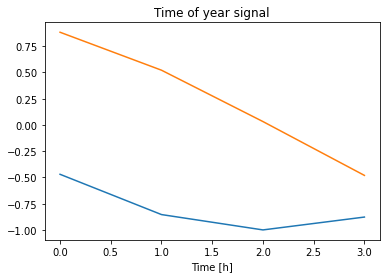

In [ ]:
# Ploting the first year
plt.plot(np.array(d['month_cos'])[:24 * 365])
plt.plot(np.array(d['month_sin'])[:24 * 365])
plt.xlabel('Time [h]')
plt.title('Time of year signal')
plt.show()

single step forecast

In [ ]:
# Number of lags (hours back) to use for models
lag = 1

# Steps ahead to forecast
n_ahead = 1

# Share of obs in testing
test_share = 0.1

# Epochs for training
epochs = 20

# Batch size
batch_size = 512

# Learning rate
lr = 0.001

# Number of neurons in LSTM layer
n_layer = 10

# The features used in the modeling
features_final = ['product_code', 'pack_size', 'carton_size' ,'cartoon_price' , 'packet_price', 'cartoon_quantity', 'value','region_code',  'month_sin', 'month_cos','sale' ]

Creating the matrices for training

In [ ]:
d[features_final].head(10)

,product_code,pack_size,carton_size,cartoon_price,packet_price,cartoon_quantity,value,region_code,month_sin,month_cos,sale
0,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,0.882712,-0.469915,126787.038462
1,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,0.521260,-0.853398,123528.105769
2,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,0.032249,-0.999480,111784.346154
3,854.461538,441.288462,29.865385,6346.538462,448.269231,108.451923,485008.230769,29951.923077,-0.480321,-0.877093,122908.740385


In [ ]:
# Subseting only the needed columns
ts = d[features_final]

nrows = ts.shape[0]

# Spliting into train and test sets
train = ts[:int(nrows * (1 - test_share))]
test = ts[int(nrows * (1 - test_share)):]

print(train)
print(test)
# Scaling the data
train_mean = train.mean()
train_std = train.std()

print(train_mean)
print(train_std)

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std
print(train)
print(test)
# Creating the final scaled frame
ts_s = pd.concat([train, test])

   product_code   pack_size  carton_size  cartoon_price  packet_price  \
0    854.461538  441.288462    29.865385    6346.538462    448.269231   
1    854.461538  441.288462    29.865385    6346.538462    448.269231   
2    854.461538  441.288462    29.865385    6346.538462    448.269231   

   cartoon_quantity          value   region_code  month_sin  month_cos  \
0        108.451923  485008.230769  29951.923077   0.882712  -0.469915   
1        108.451923  485008.230769  29951.923077   0.521260  -0.853398   
2        108.451923  485008.230769  29951.923077   0.032249  -0.999480   

            sale  
0  126787.038462  
1  123528.105769  
2  111784.346154  
   product_code   pack_size  carton_size  cartoon_price  packet_price  \
3    854.461538  441.288462    29.865385    6346.538462    448.269231   

   cartoon_quantity          value   region_code  month_sin  month_cos  \
3        108.451923  485008.230769  29951.923077  -0.480321  -0.877093   

            sale  
3  122908.740385  


In [ ]:
ts_s.dropna

<bound method DataFrame.dropna of    product_code  pack_size  carton_size  cartoon_price  packet_price  \
0           NaN  -0.816497          NaN            NaN           NaN   
1           NaN  -0.816497          NaN            NaN           NaN   
2           NaN  -0.816497          NaN            NaN           NaN   
3           NaN  -0.816497          NaN            NaN           NaN   

   cartoon_quantity  value  region_code  month_sin  month_cos      sale  
0               NaN    NaN          NaN   0.946462   1.112764  0.771401  
1               NaN    NaN          NaN   0.099620  -0.289329  0.358413  
2               NaN    NaN          NaN  -1.046081  -0.823435 -1.129814  
3               NaN    NaN          NaN  -2.246977  -0.375963  0.279924  >

In [ ]:
ts_s = ts_s.drop(['product_code', 'carton_size', 'cartoon_price', 'packet_price', 'cartoon_quantity', 'value', 'region_code'], axis = 1)

In [ ]:
#import numpy as np

#d = np.arange(528).reshape(1, 48 ,11 )

#d = d.reshape((d.shape[0]*1, 48, 11))

#print(d.shape)

In [ ]:
ts_s.shape

(4, 4)

In [ ]:
ts_s.values[0]

array([-0.81649658,  0.94646162,  1.11276388,  0.77140118])

In [ ]:
def create_X_Y(ts: np.array, lag=1, n_ahead=1, target_index=0) -> tuple:
    """
    A method to create X and Y matrix from a time series array for the training of
    deep learning models
    """
    # Extracting the number of features that are passed from the array
    n_features = ts.shape[1]

    # Creating placeholder lists
    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
        print('here')
    else:
        for i in range(len(ts) - lag - n_ahead):
            Y.append(ts[ target_index, (i + lag):(i + lag + n_ahead)])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)
    #print(f"{X}, ({X.shape[0]}, {lag}, {n_features})")
    print(X)
    print(Y)

    # Reshaping the X array to an RNN input shape
    X = np.reshape(X, (X.shape[0], lag, n_features))

    return X, Y

In [ ]:
ts_s.shape[0]

4

In [ ]:

X, Y = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead)

n_ft = X.shape[2]

[[[-0.81649658  0.94646162  1.11276388  0.77140118]]

 [[-0.81649658  0.09961978 -0.28932874  0.35841309]]]
[[0.94646162]
 [1.11276388]]


In [ ]:
# Spliting into train and test sets
Xtrain, Ytrain = X[0:int(X.shape[0] * (1 - test_share))], Y[0:int(X.shape[0] * (1 - test_share))]
Xval, Yval = X[int(X.shape[0] * (1 - test_share)):], Y[int(X.shape[0] * (1 - test_share)):]

In [ ]:
print(f"Shape of training data: {Xtrain.shape}")
print(f"Shape of the target data: {Ytrain.shape}")

print(f"Shape of validation data: {Xval.shape}")
print(f"Shape of the validation target data: {Yval.shape}")

Shape of training data: (1, 1, 4)
Shape of the target data: (1, 1)
Shape of validation data: (1, 1, 4)
Shape of the validation target data: (1, 1)


defining the model

In [ ]:
class NNMultistepModel():

    def __init__(
        self,
        X,
        Y,
        n_outputs,
        n_lag,
        n_ft,
        n_layer,
        batch,
        epochs,
        lr,
        Xval=None,
        Yval=None,
        mask_value=-999.0,
        min_delta=0.001,
        patience=5
    ):
        lstm_input = Input(shape=(n_lag, n_ft))

        # Series signal
        lstm_layer = LSTM(n_layer, activation='relu')(lstm_input)

        x = Dense(n_outputs)(lstm_layer)

        self.model = Model(inputs=lstm_input, outputs=x)
        self.batch = batch
        self.epochs = epochs
        self.n_layer=n_layer
        self.lr = lr
        self.Xval = Xval
        self.Yval = Yval
        self.X = X
        self.Y = Y
        self.mask_value = mask_value
        self.min_delta = min_delta
        self.patience = patience

    def trainCallback(self):
        return EarlyStopping(monitor='loss', patience=self.patience, min_delta=self.min_delta)

    def train(self):
        # Getting the untrained model
        empty_model = self.model

        # Initiating the optimizer
        optimizer = keras.optimizers.Adam(learning_rate=self.lr)

        # Compiling the model
        empty_model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

        if (self.Xval is not None) & (self.Yval is not None):
            history = empty_model.fit(
                self.X,
                self.Y,
                epochs=self.epochs,
                batch_size=self.batch,
                validation_data=(self.Xval, self.Yval),
                shuffle=False,
                callbacks=[self.trainCallback()]
            )
        else:
            history = empty_model.fit(
                self.X,
                self.Y,
                epochs=self.epochs,
                batch_size=self.batch,
                shuffle=False,
                callbacks=[self.trainCallback()]
            )

        # Saving to original model attribute in the class
        self.model = empty_model

        # Returning the training history
        return history

    def predict(self, X):
        return self.model.predict(X)

In [ ]:
model = NNMultistepModel(
    X=Xtrain,
    Y=Ytrain,
    n_outputs=n_ahead,
    n_lag=lag,
    n_ft=n_ft,
    n_layer=n_layer,
    batch=batch_size,
    epochs=epochs,
    lr=lr,
    Xval=Xval,
    Yval=Yval,
)

In [ ]:
model.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm (LSTM)                 (None, 10)                600       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.train()

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.9429 - val_loss: 1.1135
Epoch 2/20
1/1 [==============================] - 0s 30ms/step - loss: 0.9368 - val_loss: 1.1113
Epoch 3/20
1/1 [==============================] - 0s 33ms/step - loss: 0.9308 - val_loss: 1.1092
Epoch 4/20
1/1 [==============================] - 0s 30ms/step - loss: 0.9247 - val_loss: 1.1070
Epoch 5/20
1/1 [==============================] - 0s 27ms/step - loss: 0.9186 - val_loss: 1.1048
Epoch 6/20
1/1 [==============================] - 0s 30ms/step - loss: 0.9125 - val_loss: 1.1026
Epoch 7/20
1/1 [==============================] - 0s 28ms/step - loss: 0.9064 - val_loss: 1.1004
Epoch 8/20
1/1 [==============================] - 0s 31ms/step - loss: 0.9003 - val_loss: 1.0982
Epoch 9/20
1/1 [==============================] - 0s 33ms/step - loss: 0.8942 - val_loss: 1.0961
Epoch 10/20
1/1 [==============================] - 0s 28ms/step - loss: 0.8880 - val_loss: 1.0939
Epoch 11/20
1/1 [==============

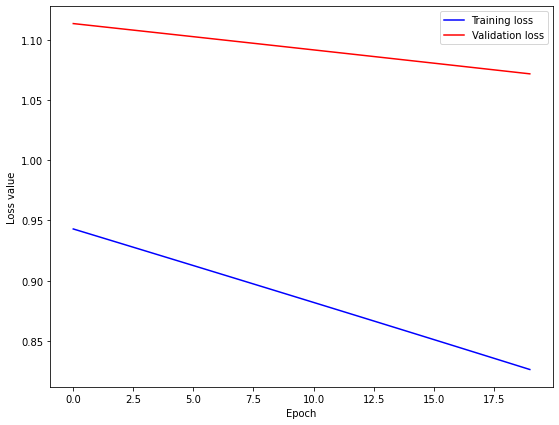

In [ ]:
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

n_epochs = range(len(loss))

plt.figure(figsize=(9, 7))
plt.plot(n_epochs, loss, 'r', label='Training loss', color='blue')
if val_loss is not None:
    plt.plot(n_epochs, val_loss, 'r', label='Validation loss', color='red')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

In [ ]:
# Comparing the forecasts with the actual values
yhat = [x[0] for x in model.predict(Xval)]
y = [y[0] for y in Yval]

In [ ]:
# Creating the frame to store both predictions
days = d['time'].values[-len(y):]

frame = pd.concat([
    pd.DataFrame({'day': days, 'sale': y, 'type': 'original'}),
    pd.DataFrame({'day': days, 'sale': yhat, 'type': 'forecast'})
])

# Creating the unscaled values column
frame['sale_absolute'] = [(x * train_std['sale']) + train_mean['sale'] for x in frame['sale']]

# Pivoting
pivoted = frame.pivot_table(index='day', columns='type')
pivoted.columns = ['_'.join(x).strip() for x in pivoted.columns.values]
pivoted['res'] = pivoted['sale_absolute_original'] - pivoted['sale_absolute_forecast']
pivoted['res_abs'] = [abs(x) for x in pivoted['res']]

In [ ]:
pivoted.tail(10)

,sale_forecast,sale_original,sale_absolute_forecast,sale_absolute_original,res,res_abs
day,,,,,,
2019-08-01,0.041001,1.112764,121023.37115,129480.767674,8457.396524,8457.396524


In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(pivoted.index, pivoted.sale, color='blue', label='original')
plt.plot(pivoted.index, pivoted.sale_forecast, color='red', label='forecast', alpha=0.6)
plt.title('sale forecasts - scaled data')
plt.legend()
plt.show()

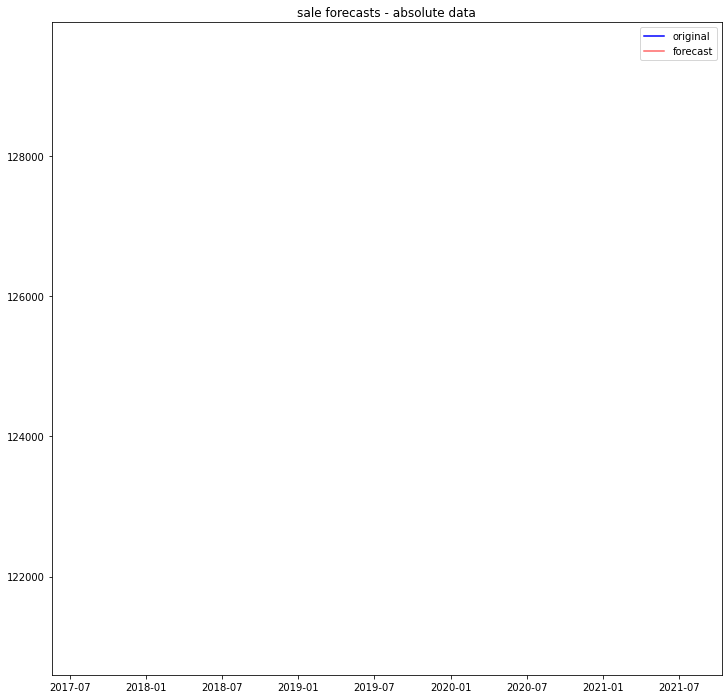

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(pivoted.index, pivoted.sale_absolute_original, color='blue', label='original')
plt.plot(pivoted.index, pivoted.sale_absolute_forecast, color='red', label='forecast', alpha=0.6)
plt.title('sale forecasts - absolute data')
plt.legend()
plt.show()

In [ ]:
pivoted = frame.pivot_table(index='day', columns='type')
pivoted.columns = ['_'.join(x).strip() for x in pivoted.columns.values]
pivoted['res'] = pivoted['sale_absolute_original'] - pivoted['sale_absolute_forecast']
pivoted['res_abs'] = [abs(x) for x in pivoted['res']]

In [ ]:
pivoted.tail(10)

,sale_forecast,sale_original,sale_absolute_forecast,sale_absolute_original,res,res_abs
day,,,,,,
2019-08-01,0.041001,1.112764,121023.37115,129480.767674,8457.396524,8457.396524


In [ ]:
print(f"Average absolute mean error: {round(pivoted['res_abs'].sum() / pivoted.shape[0], 2)} ")

Average absolute mean error: 8457.4 


In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(pivoted.res, bins=40, edgecolor='black')
plt.title('Distribution of errors')
plt.show()

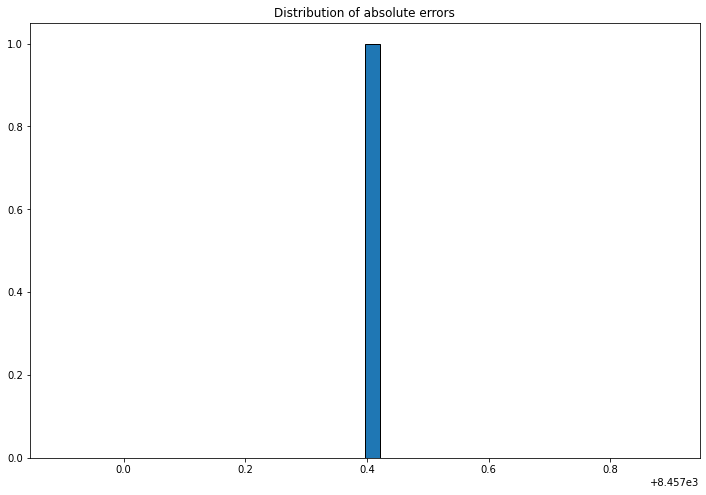

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(pivoted.res_abs, bins=40, edgecolor='black')
plt.title('Distribution of absolute errors')
plt.show()

In [ ]:
pivoted.res_abs.describe()

count       1.000000
mean     8457.396524
std              NaN
min      8457.396524
25%      8457.396524
50%      8457.396524
75%      8457.396524
max      8457.396524
Name: res_abs, dtype: float64

sequence predicton

In [ ]:
# Number of lags (hours back) to use for models
lag = 1

# Steps ahead to forecast
n_ahead = 1

# Share of obs in testing
test_share = 0.1

# Epochs for training
epochs = 20

# Batch size
batch_size = 512

# Learning rate
lr = 0.001

# Number of neurons in LSTM layer
n_layer = 10

In [ ]:
X, Y = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead)

n_ft = X.shape[2]

[[[-0.81649658  0.94646162  1.11276388  0.77140118]]

 [[-0.81649658  0.09961978 -0.28932874  0.35841309]]]
[[0.94646162]
 [1.11276388]]


In [ ]:
# Spliting into train and test sets
Xtrain, Ytrain = X[0:int(X.shape[0] * (1 - test_share))], Y[0:int(X.shape[0] * (1 - test_share))]
Xval, Yval = X[int(X.shape[0] * (1 - test_share)):], Y[int(X.shape[0] * (1 - test_share)):]

print(f"Shape of training data: {Xtrain.shape}")
print(f"Shape of the target data: {Ytrain.shape}")

print(f"Shape of validation data: {Xval.shape}")
print(f"Shape of the validation target data: {Yval.shape}")

Shape of training data: (1, 1, 4)
Shape of the target data: (1, 1)
Shape of validation data: (1, 1, 4)
Shape of the validation target data: (1, 1)


In [ ]:
model = NNMultistepModel(
    X=Xtrain,
    Y=Ytrain,
    n_outputs=n_ahead,
    n_lag=lag,
    n_ft=n_ft,
    n_layer=n_layer,
    batch=batch_size,
    epochs=epochs,
    lr=lr,
    Xval=Xval,
    Yval=Yval,
)

In [ ]:
model.model.summary()

In [ ]:
history = model.train()

In [ ]:
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

n_epochs = range(len(loss))

plt.figure(figsize=(9, 7))
plt.plot(n_epochs, loss, 'r', label='Training loss', color='blue')
if val_loss is not None:
    plt.plot(n_epochs, val_loss, 'r', label='Validation loss', color='red')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

In [ ]:
# Forecasting on all the samples in the validation set
forecast = model.predict(Xval)


In [ ]:
print(forecast)

In [ ]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=(15, 15),
    facecolor="w",
    edgecolor="k"
)

indexes = random.sample(range(len(forecast)), 8)

for i, index in enumerate(indexes):

    yhat = forecast[index]
    y = Yval[index]

    frame = pd.concat([
        pd.DataFrame({'day': range(len(y)), 'temp': y, 'type': 'original'}),
        pd.DataFrame({'day': range(len(y)), 'temp': yhat, 'type': 'forecast'})
    ])

    frame['temp'] = [(x * train_std['temp']) + train_mean['temp'] for x in frame['temp']]

    sns.lineplot(x='day', y='temp', ax = axes[i // 2, i % 2], data=frame, hue='type', marker='o')

plt.tight_layout()

plt.show()

In [ ]:
# Calculating the total average absolute error
error = 0
n = 0
residuals = []

for i in range(Yval.shape[0]):
    true = Yval[i]
    hat = forecast[i]
    n += len(true)

    true = np.asarray([(x * train_std['sale']) + train_mean['sale'] for x in true])
    hat = np.asarray([(x * train_std['sale']) + train_mean['sale'] for x in hat])

    residual = true - hat
    residuals.append(residual)

    error += np.sum([abs(x) for x in true - hat])

print(f'Final average absolute error: {round(error / n, 2)} C')

In [ ]:
# Flattening the list of arrays of residuals
residuals = np.asarray(residuals).flatten().tolist()
abs_residuals = [abs(x) for x in residuals]

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=40, edgecolor='black')
plt.title('Distribution of errors - 24 hour forecast')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(abs_residuals, bins=40, edgecolor='black')
plt.title('Distribution of errors - 1 month forecast - absolute')
plt.show()

In [ ]:
print(f"Median absoulte error: {round(np.median(abs_residuals), 2)} ")